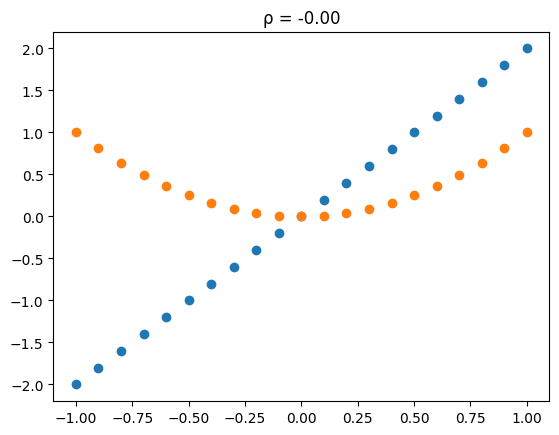

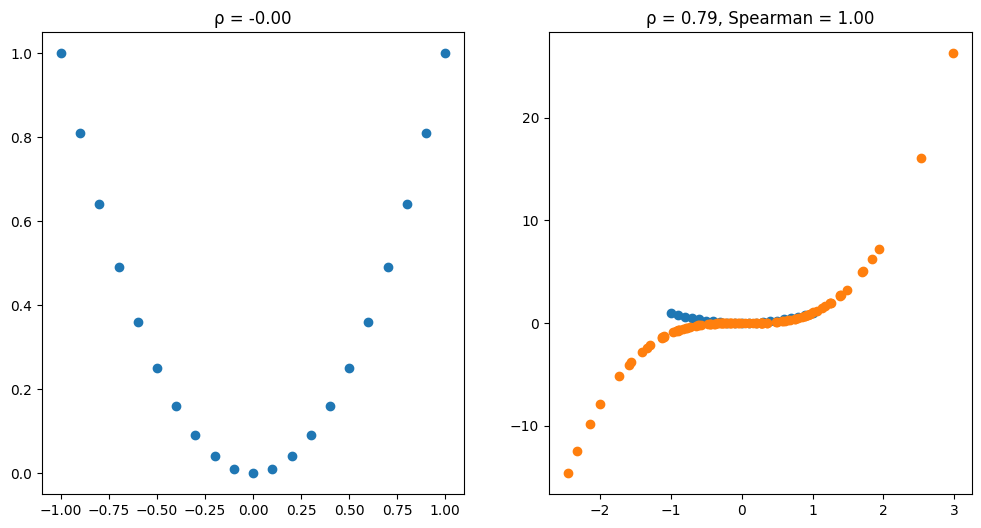

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import rankdata

# Pearson Correlated
x = np.arange(-1, 1.1, 0.1)
y = 2*x

df = pd.DataFrame({'x': x, 'y': y})

rho = np.corrcoef(x, y)[0, 1]
plt.scatter(df['x'], df['y'])
plt.title(f'ρ = {rho:.2f}')
plt.savefig('pearson_correlated.png')

# 0 Pearson Correlation
y = x**2

df = pd.DataFrame({'x': x, 'y': y})

rho = np.corrcoef(x, y)[0, 1]
plt.scatter(df['x'], df['y'])
plt.title(f'ρ = {rho:.2f}')
plt.savefig('pearson_uncorrelated.png')

# Combine plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(x, y)
axs[0].set_title(f'ρ = {rho:.2f}')
axs[1].scatter(x, x**2)
axs[1].set_title(f'ρ = {np.corrcoef(x, x**2)[0, 1]:.2f}')
plt.savefig('pearson.png')

# Spearman Correlation
x = np.random.normal(size=100)
y = x**3

df = pd.DataFrame({'x': x, 'y': y})

rho = np.corrcoef(x, y)[0, 1]
spearman = np.corrcoef(np.argsort(x), np.argsort(y))[0, 1]
plt.scatter(df['x'], df['y'])
plt.title(f'ρ = {rho:.2f}, Spearman = {spearman:.2f}')
plt.savefig('spearman.png')

In [17]:
# Example Spearman calculation using Tied Ranks and the Pearson Correlation
x = [1.2,
0.8,
1.3,
0.8,
0.8,
0.5]

y = np.random.normal(size=6)
res = stats.spearmanr(x, y)

print(f'Spearman {res.statistic:.2f}')

r_x = rankdata(x, method='average')
r_y = rankdata(y, method='average')

print(f"Calculated Spearman {np.corrcoef(r_x, r_y)[0, 1]:.2f}")

Spearman 0.39
Calculated Spearman 0.39


In [42]:
# MLE
np.random.seed(0)
n = 100
# x = np.random.normal(loc=1.0, scale=5.0, size=n)
# np.savetxt('../data/x.csv', x)
def myll(params):
    m, s = params
    xm = x - m
    s2 = s*s
    ll = -n / 2 * np.log(s2 * 2 * np.pi) - np.sum(xm**2) / (2*s2)
    return ll

print(f"log likelihood N(0,1) = {myll([0.0, 1.0]):.2f}")
print(f"log likelihood N(1,5) = {myll([1.0, 5.0]):.2f}")



log likelihood N(0,1) = -1446.05
log likelihood N(1,5) = -303.81


In [43]:
import numpy as np
from scipy.optimize import minimize


# Initial guesses
initial_params = [0.0, 1.0]

# Bounds for the parameters: sigma must be >= 0
bounds = [(None, None), (0, None)]

# Optimize the log-likelihood function
result = minimize(lambda params: -myll(params), initial_params, bounds=bounds)

# Extract the optimized parameters
m_hat, s_hat = result.x

print(f"Mean Data vs Optimized {np.mean(x)} - {m_hat}")
print(f"Std Data vs Optimized {np.std(x)} - {s_hat}")
print(f"Optimized N({m_hat},{s_hat}) = {myll([m_hat, s_hat])}")

# Calculate biased standard deviation
xm = x - m_hat
s2 = np.dot(xm, xm) / len(x)
s = np.sqrt(s2)
print(f"Biased Std Data vs Optimized {s} - {s_hat}")

Mean Data vs Optimized 1.299040077672425 - 1.2990493890282486
Std Data vs Optimized 5.039411223582898 - 5.039416578009932
Optimized N(1.2990493890282486,5.039416578009932) = -303.62277877490357
Biased Std Data vs Optimized 5.039411223591501 - 5.039416578009932


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# MLE for Regression
n = 5000
df = pd.read_csv('../data/data.csv')

Beta = np.arange(1, 6)
x = np.array(df.drop(columns=['y']))
y = np.array(df['y'])
# x = np.hstack((np.ones((n, 1)), np.random.normal(size=(n, 4))))
# y = np.dot(x, Beta) + np.random.normal(size=n)

def myll(params):
    sigma = params[0]
    beta = params[1:]
    e = y - np.dot(x, beta)
    s2 = sigma*sigma
    ll = -n/2 * np.log(s2 * 2 * np.pi) - np.sum(e**2)/(2*s2)
    return -ll

res = minimize(myll, [1.0] + [0.0]*5)
sigma_hat = res.x[0]
beta_hat = res.x[1:]

print(f'Betas: {beta_hat}')

b_hat = np.linalg.inv(np.dot(x.T, x)).dot(np.dot(x.T, y))
print(f'OLS: {b_hat}')


Betas: [1.00086078 1.99418294 3.03199956 4.01825475 5.00562568]
OLS: [1.00086078 1.99418294 3.03199956 4.01825474 5.00562568]


C:\Users\keese\AppData\Local\Temp\ipykernel_53584\1280416608.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  Adj_R2 = 1.0 - (sse / ssy) * (n - 1) / (n - p - 1)


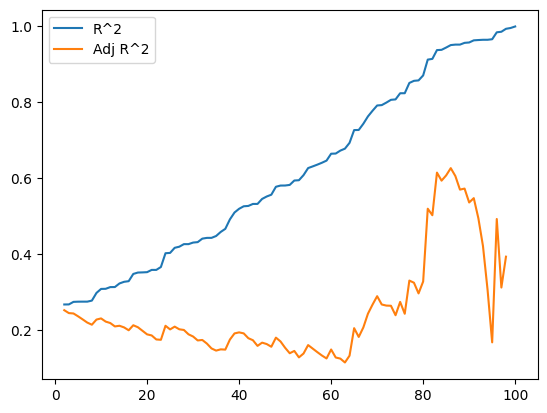

In [59]:
import pandas as pd
import numpy as np

# Read the data
prob1 = pd.read_csv("../data/problem1.csv")
n = prob1.shape[0]
X = np.column_stack((np.ones(n), prob1['x']))
Y = prob1['y'].values

def calc_r2(Y, X):
    n = Y.shape[0]
    p = X.shape[1]

    B = np.linalg.inv(X.T @ X) @ X.T @ Y
    e = Y - X @ B

    sse = e.T @ e
    Y_n = Y - np.mean(Y)
    ssy = Y_n.T @ Y_n

    R2 = 1.0 - sse / ssy
    Adj_R2 = 1.0 - (sse / ssy) * (n - 1) / (n - p - 1)
    return R2, Adj_R2

p = np.arange(2.0, 101.0)
R2 = np.empty(p.shape[0])
aR2 = np.empty(p.shape[0])

R2[0], aR2[0] = calc_r2(Y, X)

for i in range(1, len(p)):
    X = np.hstack((X, np.random.randn(n, 1)))
    R2[i], aR2[i] = calc_r2(Y, X)

# Plot the results
plt.plot(p, R2, label="R^2")
plt.plot(p, aR2, label="Adj R^2")
plt.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_ts(y, imgName="series", length=10, title=None):
    n = len(y)
    l = np.arange(1, length+1)
    acf_y = acf(y, nlags=length, fft=False)
    pacf_y = pacf(y, nlags=length, method='ywm')

    fig, axs = plt.subplots(3, 1, figsize=(8, 12))
    axs[0].plot(y)
    axs[0].set_title(title)

    axs[1].bar(l, acf_y[1:])
    axs[1].set_title('AutoCorrelation')

    axs[2].bar(l, pacf_y[1:])
    axs[2].set_title('Partial AutoCorrelation')

    plt.tight_layout()
    plt.savefig(imgName)

In [ ]:
# AR1
np.random.seed(0)
n = 1000
burn_in = 50
y = np.zeros(n)

yt_last = 1.0
df = pd.read_csv('../data/x.csv')
e = np.array(df['e'])#np.random.normal(0, 0.1, n+burn_in)

for i in range(n+burn_in):
    y_t = 1.0 + 0.5*yt_last + e[i]
    yt_last = y_t
    if i > burn_in - 1:
        y[i-burn_in-1] = y_t


print(f"Mean and Var of Y: {np.mean(y):.2f}, {np.var(y):.4f}")
print(f"Expected values Y: {2.0:.2f}, {0.01/(1-0.5**2):.4f}")

plot_ts(y, imgName="ar1_acf_pacf.png", title="AR 1")

model = SARIMAX(y, order=(1,0,0),seasonal_order=(0,0,0,0), trend='c')
model_fit = model.fit(disp=False)
print(model_fit.summary())


Mean and Var of Y: 0.99, 0.0115
Expected values Y: 2.00, 0.0125
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 908.977
Date:                Mon, 20 Jan 2025   AIC                          -1811.954
Time:                        14:18:44   BIC                          -1797.231
Sample:                             0   HQIC                         -1806.359
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9929      0.005    217.586      0.000       0.984       1.002
ma.L1          0.4802      0.028     16.992      0.000       0.425 

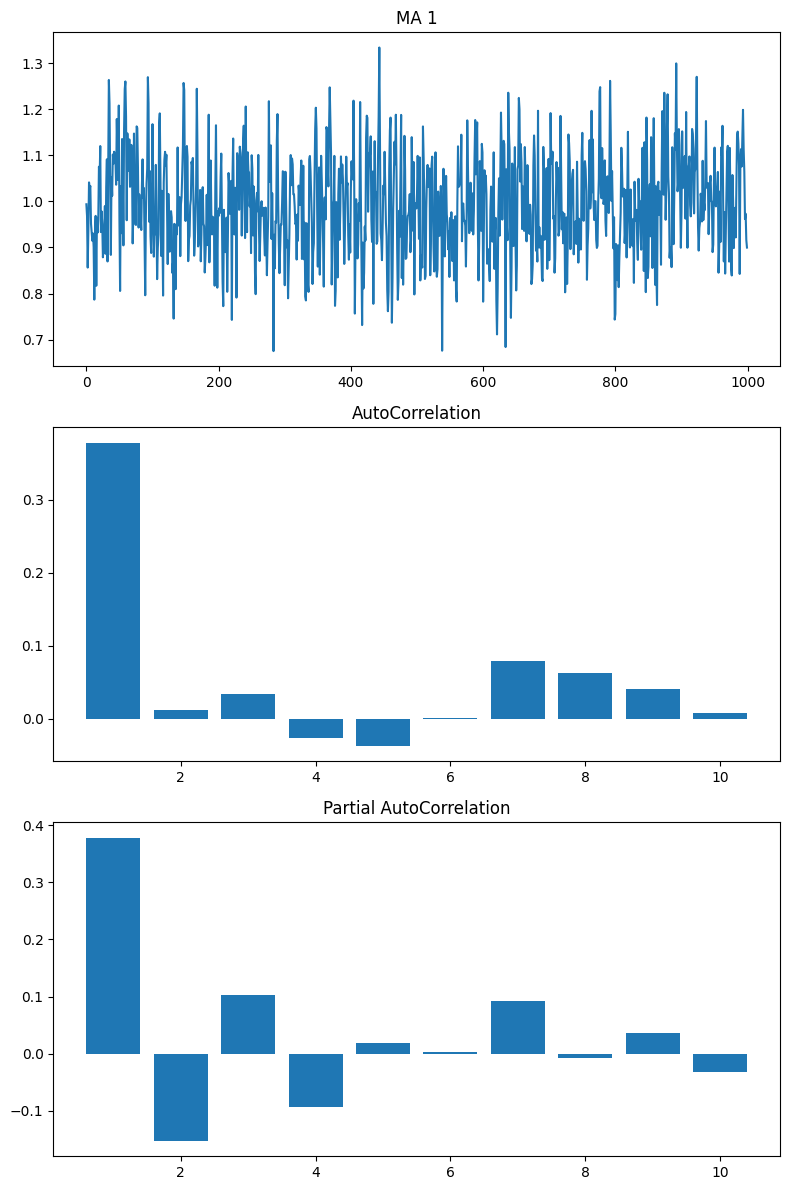

In [105]:
# AR1
np.random.seed(0)
n = 1000
burn_in = 50
y = np.zeros(n)

yt_last = 1.0
e = np.random.normal(0, 0.1, n+burn_in)

for i in range(1, n + burn_in):
    y_t = 1.0 + 0.5 * e[i-1] + e[i]
    if i >= burn_in-1:
        y[i-burn_in-1] = y_t


print(f"Mean and Var of Y: {np.mean(y):.2f}, {np.var(y):.4f}")
print(f"Expected values Y: {2.0:.2f}, {((1+0.5**2)*0.01):.4f}")

plot_ts(y, imgName="ma1_acf_pacf.png", title="MA 1")

model = SARIMAX(y, order=(0,0,1),seasonal_order=(0,0,0,0), trend='c')
model_fit = model.fit(disp=False)
print(model_fit.summary())
